# WFS stars arrangement


In [1]:
import os
from astropy.table import Table
import numpy as np

# IMPORT CUSTOM FUNCTIONS 
import sys
sys.path.append('../analysis_tools/')
from calcMetrics import calcMetrics
import analysisTools as at 

# IMPORT LSST MODULES 
from lsst.ts.wep.ParamReader import ParamReader
from lsst.ts.wep.Utility import FilterType

from lsst.ts.ofc.Utility import InstName
from lsst.ts.ofc.ctrlIntf.OFCCalculationFactory import OFCCalculationFactory

from lsst.ts.phosim.SkySim import SkySim
from lsst.ts.phosim.OpdMetrology import OpdMetrology
from lsst.ts.phosim.Utility import getAoclcOutputPath, getConfigDir

# IMPORT PLOTTING MODULES
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

### 1) Showing how far we get with the AOS loop for simulated arrangements of stars for WFS corner sensors

In [9]:
# setup the location of analysis files ... 
baseDir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
topDir = 'results_wfs'
expDir = 'arrowStars_2020_24'

data_dir = os.path.join(baseDir, topDir,expDir)
raft = 'R04'
detector = 'S20'
import imp
imp.reload(at)
image = at.readImage(data_dir, focalType='intra', 
                     raft=raft, detector=detector,
                     imgType='postISR')

data_id is
{'visit': 9006002, 'filter': 'g', 'raftName': 'R04', 'detectorName': 'S20', 'detector': 204}
Reading postISR images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24/input/rerun/run1
Done



Reading info about postage-stamp images from donutStarsExtraIntra.txt


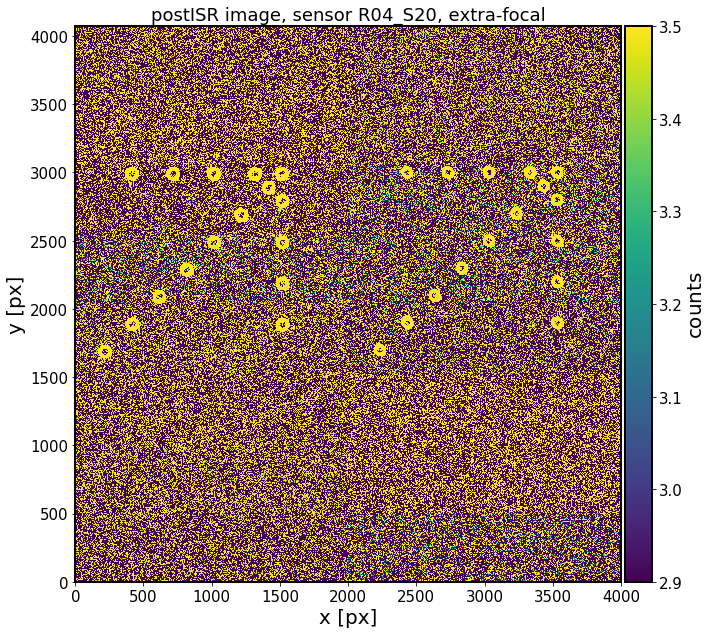

In [13]:
import imp
imp.reload(at)
postage_dir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24/postage/'
postage, postFlag =  at.readPostageStars(postage_dir, fname ='donutStarsExtraIntra.txt')
at.plotImage(image,ax=None, log=False, sensor='R04_S20', focalType=focalType,
          postage=postage,postFlag=postFlag, centroid=False, 
          starMarker='redCross',starMarkerArgs=None,
          centMarkerArgs = None,centMarker='redCross',plotArgs={'vmin':2.9, 'vmax':3.5})



In [4]:
postage_dir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24/postage/'

Using postage images from /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24/postage/
Searching in /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24/postage/ directory

Available postage stamp images for sensor R04_S20: 

Looking for files that start with "extra_singleSciImg" and contain "R04_S20"...

Found 3 singleSciImg postage stamp images 
['extra_singleSciImg_sensor-R04_S20_C1_star-0_id-14_posX-1454_posY-2611.txt', 'extra_singleSciImg_sensor-R04_S20_C1_star-1_id-15_posX-1146_posY-2919.txt', 'extra_singleSciImg_sensor-R04_S20_C1_star-2_id-16_posX-0_posY-1860.txt']

Looking for files that start with "extra_imgDeblend_full" and contain "R04_S20"...

Found 3 imgDeblend_full postage stamp images 
['extra_imgDeblend_full_sensor-R04_S20_C1_star-0_id-14_posX-1454_posY-2611.txt', 'extra_imgDeblend_full_sensor-R04_S20_C1_star-1_id-15_posX-1146_posY-2919.txt', 'extra_imgDeblend_fu

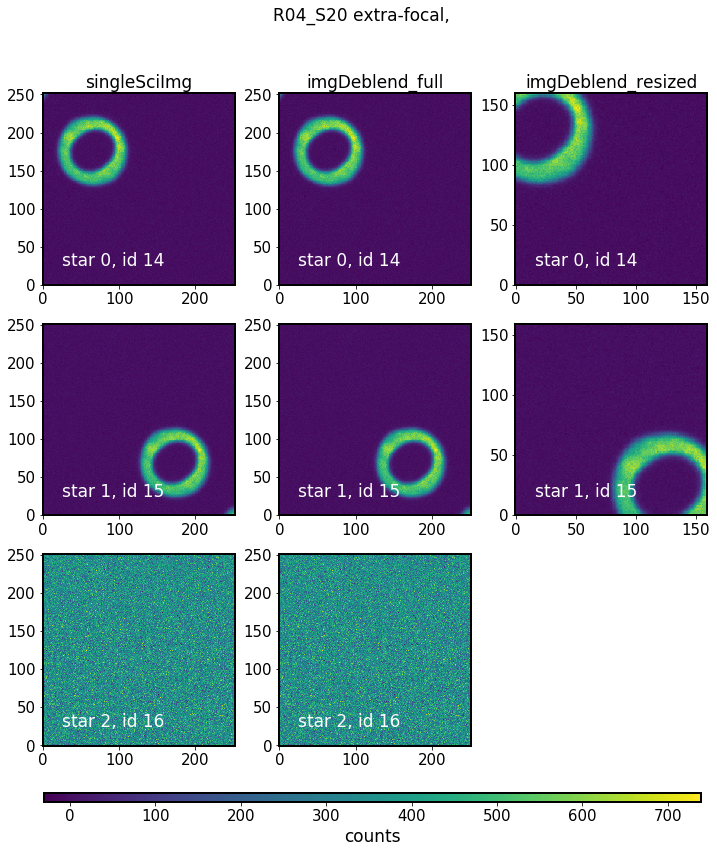

In [6]:
%matplotlib inline
at.plotPostageStamps(postage_dir, sensor='R04_S20', focalType='extra',)

The error is at the `ofcCalc.calculateCorrections` stage: 
    
    
     sensorName  R:4,4 S:0,0,A  abbrevDetectorName  R44_S00_C0  starId= 10  donut px pos =  (261.3268076187826, 2514.505252330638)
    Saving donut info to results_wfs/arrowStars_2020_24/postage/donutStarsExtraIntra.txt
    Traceback (most recent call last):
      File "runWfsStar.py", line 82, in <module>
        phosimRepackagerKeepOriginal = True )
      File "/data/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/baseWfsWep.py", line 339, in main
        ofcCalc.calculateCorrections(listOfWfErr)
      File "/astro/store/epyc/projects/lsst_comm/ts_ofc/python/lsst/ts/ofc/ctrlIntf/OFCCalculation.py", line 486, in calculateCorrections
        self._setZtaacGainByPSSN()
      File "/astro/store/epyc/projects/lsst_comm/ts_ofc/python/lsst/ts/ofc/ctrlIntf/OFCCalculation.py", line 527, in _setZtaacGainByPSSN
        self.ztaac.setGainByPSSN(pssn, sensorNameList)
      File "/astro/store/epyc/projects/lsst_comm/ts_ofc/python/lsst/ts/ofc/ZTAAC.py", line 199, in setGainByPSSN
        fwhmGq = self.optCtrl.calcEffGQFWHM(self.dataShare, pssn, fieldIdx)
      File "/astro/store/epyc/projects/lsst_comm/ts_ofc/python/lsst/ts/ofc/OptCtrlDefault.py", line 202, in calcEffGQFWHM
        fwhmGq = np.sum(qWgt[fieldIdx] * fwhm)
    IndexError: index 33 is out of bounds for axis 0 with size 31


### 2) Testing changes to phosim_utils in weekly 2020_34, i.e. PR240

**Executive summary**: 

* PR240 to `obs_lsst` affects modules that are used by `lsst.obs.lsst.phosim.PhosimMapper` to define the corner sensors in the `phosim_repackager.py`.  
* The PR240 is included in weeklies up and above `2020_33`
* We used `2020_34` weekly of `obs_lsst` to show that there is **no change in orientation** 


**Step-by-step:**

RHL did an update : https://github.com/lsst/obs_lsst/pull/240. The changes affect `lsst/obs/lsst/assembly.py`  and `lsstCamMapper.py `. 

The repackager, living at `epyc/projects/lsst_comm/phosim_utils/python/lsst/phosim/utils/phosim_repackager.py` uses `lsst.obs.lsst.phosim.PhosimMapper` https://github.com/lsst/obs_lsst/blob/master/python/lsst/obs/lsst/phosim.py , which inherits from `LsstCamMapper` https://github.com/lsst/obs_lsst/blob/e8960634dce17fa4e9d479800d8c375a9ce7750d/python/lsst/obs/lsst/lsstCamMapper.py#L430 which is in turn based on `LsstCamBaseMapper` , which instantiates camera object with `lsst.obs.base.yamlCamera`, that lives at https://github.com/lsst/obs_base/blob/master/python/lsst/obs/base/yamlCamera.py


I cloned to `/epyc/users/suberlak/aos/Commissioning/aos/stack_w_2020_34/` the specific tag  for `obs_lsst`: 

    git clone -b 'w.2020.34' --single-branch --depth 1 https://github.com/lsst/obs_lsst.git 
    
( `git tag -l` shows that's the tag I downloaded ).


I copied the setup script from `/epyc/users/suberlak/aos/Commissioning/aos/setup_aos_2020_24.sh` to `setup_aos_2020_34.sh`, changing two lines 

eups declare -r /path/to/obs_lsst/ -t $USER
setup obs_lsst -t $USER

I ran 

    source /epyc/users/suberlak/aos/Commissioning/aos/setup_aos_2020_34.sh
    
Then inside `aos/stack_w_2020_34/obs_lsst` I run `scons` to build the package.

Thus I was able to use the `2020_34` weekly of `obs_lsst`,  which is the dependency that changed for `phosim_utils`. 


I updated in `PhosimCmpt.py` the `repackageLsstCamAmpImgFromPhosim()` function  , with `keepOriginal` kwarg,  that allows to keep the raw phosim output files before they get repackaged in `iter0/img/orig`.  

For corner WFS we're only using `intra` setting (they are called `intra`, but they contain both `intra` and `extra` ) :

I simulated the directional arrangement of arrows on corner WFS : 

    source /epyc/users/suberlak/aos/Commissioning/aos/setup_aos_2020_24.sh
    cd /epyc/users/suberlak/aos/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/
    python runWfsStar.py
    
   

Show the actual repackaged raw images : 

In [14]:
image = at.readImage(data_dir, focalType='intra', 
                     raft=raft, detector=detector,
                     imgType='raw')

data_id is
{'visit': 9006002, 'filter': 'g', 'raftName': 'R04', 'detectorName': 'S20', 'detector': 204}
Reading raw images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24/input/


Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['AIRMASS'] in header"
Ignoring Error calculating property 'temperature' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['TEMPERA'] in header"
Ignoring Error calculating property 'pressure' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['PRESS'] in header"


Done



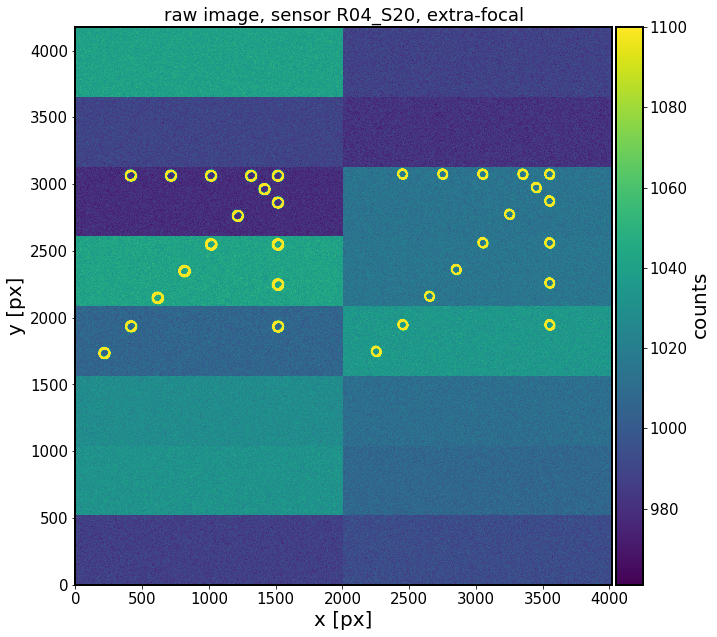

In [28]:
imp.reload(at)
at.plotImage(image,ax=None, log=False, sensor='R04_S20', focalType=focalType,
             postage=postage,postFlag=postFlag, centroid=False, 
             starMarker='redCross',starMarkerArgs=None,
             centMarkerArgs = None,centMarker='redCross',
             imgType='raw', plotArgs={ 'vmax':1100},)



Then I switched to stack that uses the `2020_34` `obs_lsst`:  

    source /epyc/users/suberlak/aos/Commissioning/aos/setup_aos_2020_34.sh

Then I run repackaging again:  
    
   from `iter0/img/orig/`   (where the originals are kept) to `iter0/img/intra1/`  (a new location ) , run 
   
   

In [31]:
# Run the repackager in the terminal where 2020_34 was sourced 

outputImgDir = os.path.join(data_dir, 'iter0')
phosimImgDir = os.path.join(outputImgDir, 'img/orig/')

repackagedImgDir = os.path.join(outputImgDir, 'img/intra1/')
if not os.path.exists(repackagedImgDir):
    os.makedirs(repackagedImgDir)
    
command = "phosim_repackager.py"
argstring = "%s --out_dir=%s" % (phosimImgDir, repackagedImgDir)
print(command, argstring)

phosim_repackager.py /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24/iter0/img/orig/ --out_dir=/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24/iter0/img/intra1/


Now because ingest creates a new registry,  if there already is a registry it complains of non-unique names...
So I copied all content of `arrowStars_2020_24` to  --> `arrowStars_2020_24_reingest` , and removed the `input/registry`,  `input/raw` ,  `input/raw1` , so that the files repackaged with `2020_24` weekly of `obs_lsst` (before https://github.com/lsst/obs_lsst/pull/240) are in `arrowStars_2020_24`, and those repackaged with `2020_34` weekly of `obs_lsst` (after the PR240) are in `arrowStars_2020_24_reingest` 

In [37]:
# ingest the raw images from intra   to raw1 , but using 2020_24, so that the calib was  
root_dir = '/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/'
data_dir = os.path.join(root_dir, 'results_wfs/arrowStars_2020_24_reingest/')
isrDir = os.path.join(data_dir, 'input/')
rawDir = os.path.join(data_dir, 'iter0/img/intra1')
rawImgFiles = os.path.join(rawDir, "*_a_*.fits*")

outputDir = os.path.join(data_dir, 'input/raw1/')

argstring = '%s %s '%(isrDir, rawImgFiles)
print("\nRun in a terminal the following:")
print("ingestImages.py %s"%argstring)


Run in a terminal the following:
ingestImages.py /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24_reingest/input/ /epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24_reingest/iter0/img/intra1/*_a_*.fits* 


Show the files repackaged with `2020_34`,  i.e. after RHL's change https://github.com/lsst/obs_lsst/pull/240 : 

In [44]:
images = {}
for sensor in ['R00_S22','R04_S20','R40_S02','R44_S00']:
    raft = sensor[:3]
    detector = sensor[4:]
    print(raft, detector)
    images[sensor] = at.readImage(data_dir, focalType='intra', 
                     raft=raft, detector=detector,
                     imgType='raw')
    

R00 S22
data_id is
{'visit': 9006002, 'filter': 'g', 'raftName': 'R00', 'detectorName': 'S22', 'detector': 197}
Reading raw images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24_reingest/input/


Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['AIRMASS'] in header"
Ignoring Error calculating property 'temperature' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['TEMPERA'] in header"
Ignoring Error calculating property 'pressure' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['PRESS'] in header"


Done

R04 S20
data_id is
{'visit': 9006002, 'filter': 'g', 'raftName': 'R04', 'detectorName': 'S20', 'detector': 204}
Reading raw images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24_reingest/input/


Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['AIRMASS'] in header"
Ignoring Error calculating property 'temperature' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['TEMPERA'] in header"
Ignoring Error calculating property 'pressure' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['PRESS'] in header"


Done

R40 S02
data_id is
{'visit': 9006002, 'filter': 'g', 'raftName': 'R40', 'detectorName': 'S02', 'detector': 209}
Reading raw images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24_reingest/input/


Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['AIRMASS'] in header"
Ignoring Error calculating property 'temperature' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['TEMPERA'] in header"
Ignoring Error calculating property 'pressure' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['PRESS'] in header"


Done

R44 S00
data_id is
{'visit': 9006002, 'filter': 'g', 'raftName': 'R44', 'detectorName': 'S00', 'detector': 216}
Reading raw images from the following repo_dir:
/epyc/users/suberlak/Commissioning/aos/ts_phosim/notebooks/analysis_scripts/results_wfs/arrowStars_2020_24_reingest/input/


Ignoring Error calculating property 'boresight_airmass' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['AIRMASS'] in header"
Ignoring Error calculating property 'temperature' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['TEMPERA'] in header"
Ignoring Error calculating property 'pressure' using translator <class 'lsst.obs.lsst.translators.phosim.LsstPhoSimTranslator'>: "Could not find ['PRESS'] in header"


Done



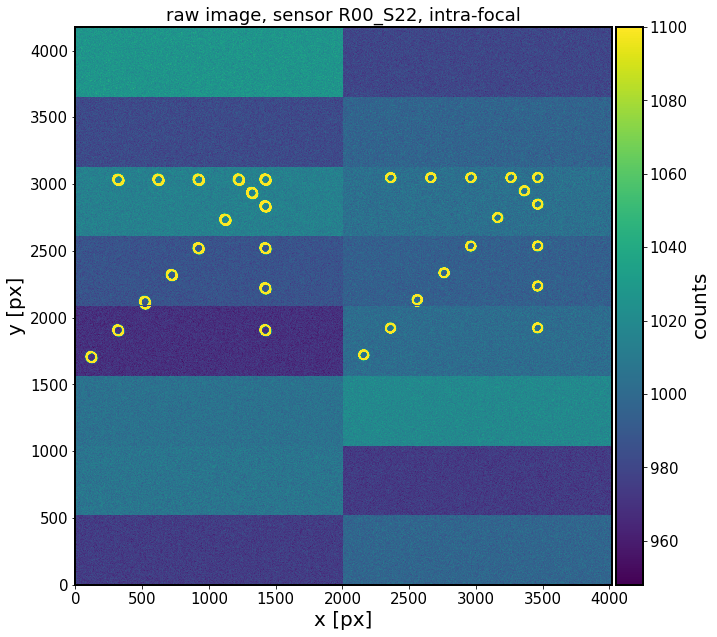

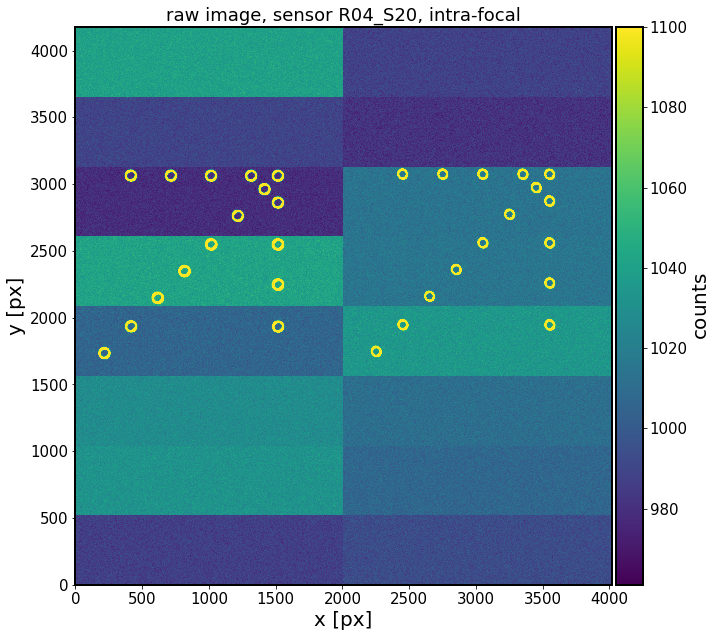

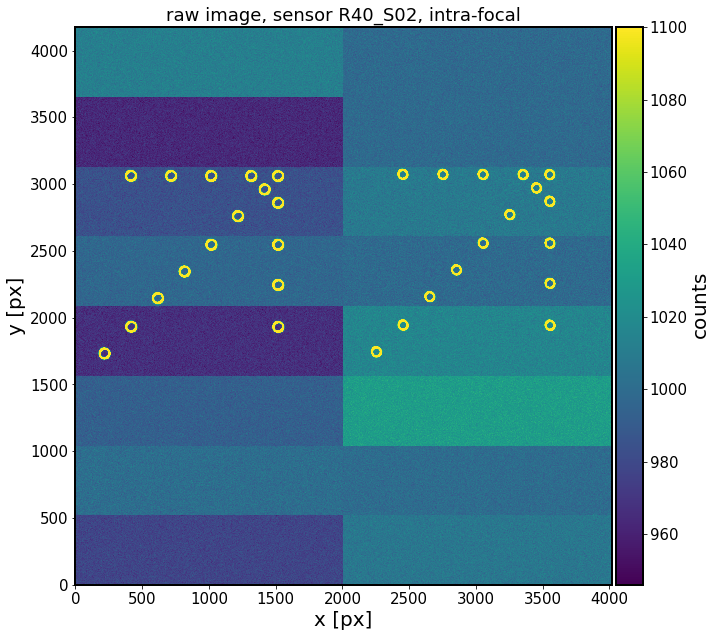

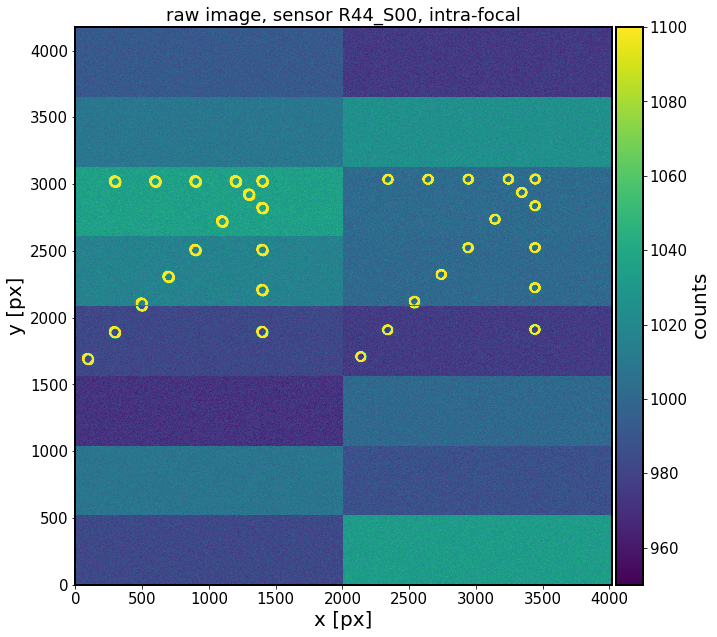

In [45]:
imp.reload(at)
for sensor in images.keys():
    at.plotImage(images[sensor],ax=None, log=False, sensor=sensor, 
                 focalType='intra',postFlag=False, centroid=False, 
             starMarker='redCross',starMarkerArgs=None,
             centMarkerArgs = None,centMarker='redCross',
             imgType='raw', plotArgs={ 'vmax':1100},)




Looks the same as before - so I consider that this change didn't mess anything ... 